# Data Preprocesssing and visualisation

Importing libraries

In [ ]:
import scipy.io   # To use the '.mat' files
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

mounting on the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

joining root directory to the file_name for each of the .mat files

In [ ]:

for root, dirs, files in os.walk("/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/14_IR.mat
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/21_BA.mat
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/14_OR1.mat
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/14_BA.mat
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/21_OR3.mat
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/21_OR2.mat
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/21_OR1.mat
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/21_IR.mat
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/7_OR1.mat
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/7_IR.mat
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/7_BA.mat
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/N.mat
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KH

In [ ]:
path = r'/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/7_OR3'
mat = scipy.io.loadmat(path)

In [ ]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 12:25:53 2000'), ('__version__', '1.0'), ('__globals__', []), ('X161_DE_time', array([[0.328152  ],
       [0.24011631],
       [0.15333231],
       ...,
       [0.16146831],
       [0.235944  ],
       [0.20027077]])), ('X161_FE_time', array([[-0.05156909],
       [ 0.00308182],
       [ 0.07273091],
       ...,
       [ 0.08362   ],
       [ 0.03472182],
       [ 0.05033636]])), ('X161RPM', array([[1796]], dtype=uint16))])

total number of keys in the dictionary

In [ ]:
list(mat.keys())

['__header__',
 '__version__',
 '__globals__',
 'X161_DE_time',
 'X161_FE_time',
 'X161RPM']

only Drive_end data is being considered

In [ ]:
key_name=list(mat.keys())[3]

In [ ]:
DE_data=mat.get(key_name)

In [ ]:
file_name

'7_OR2.mat'

In [ ]:
fault=np.full((len(DE_data),1), file_name[:-4])

In [ ]:
df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

In [ ]:
df_temp

,DE_data,fault
0,0.328152,7_OR2
1,0.240116,7_OR2
2,0.153332,7_OR2
3,0.070303,7_OR2
4,-0.000626,7_OR2
...,...,...
129964,0.103056,7_OR2
129965,0.137686,7_OR2
129966,0.161468,7_OR2
129967,0.235944,7_OR2


**DATA VISUALISATION**

PLOTS

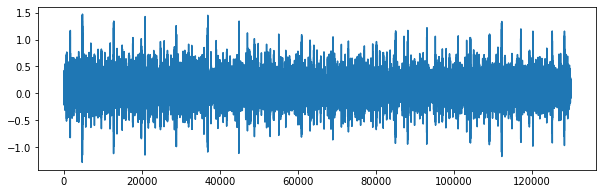

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(df_temp.iloc[:,0])
plt.show()

Converting all faults into .csv file, so we can apply ML models easily in future

In [ ]:
df=pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk("/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        key_name = list(mat.keys())[3]
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})
        
        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())
        
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/all_faults.csv',index=False)     

/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/14_IR.mat
['14_IR']
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/21_BA.mat
['14_IR' '21_BA']
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/14_OR1.mat
['14_IR' '21_BA' '14_OR1']
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/14_BA.mat
['14_IR' '21_BA' '14_OR1' '14_BA']
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/21_OR3.mat
['14_IR' '21_BA' '14_OR1' '14_BA' '21_OR3']
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/21_OR2.mat
['14_IR' '21_BA' '14_OR1' '14_BA' '21_OR3' '21_OR2']
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/21_OR1.mat
['14_IR' '21_BA' '14_OR1' '14_BA' '21_OR3' '21_OR2' '21_OR1']
/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/21_IR.mat
['14_IR' '21_BA' '14_OR1' '14_BA' '21_OR3' '21_OR2' '21_OR1' '21_IR']
/content/drive/MyDrive/Colab Notebooks/Intern Project

In [ ]:
df = pd.read_csv('all_faults.csv')

In [ ]:
df

,DE_data,fault
0,0.181957,14_IR
1,0.203241,14_IR
2,0.211588,14_IR
3,0.196564,14_IR
4,0.164847,14_IR
...,...,...
2782624,-0.289975,7_OR2
2782625,-0.332950,7_OR2
2782626,-0.341086,7_OR2
2782627,-0.328152,7_OR2


plotting all data separately

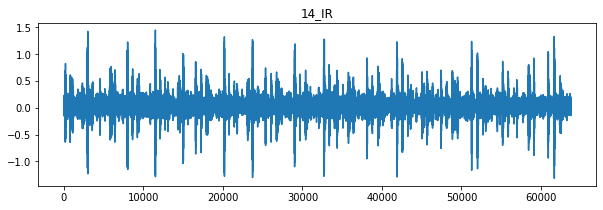

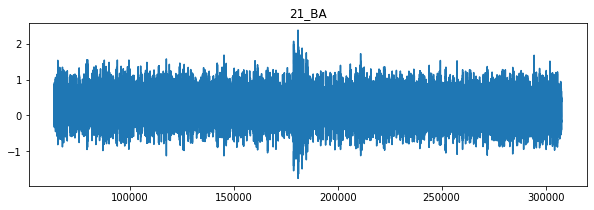

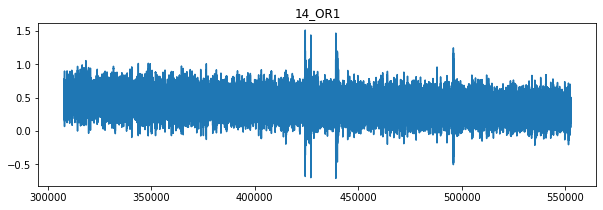

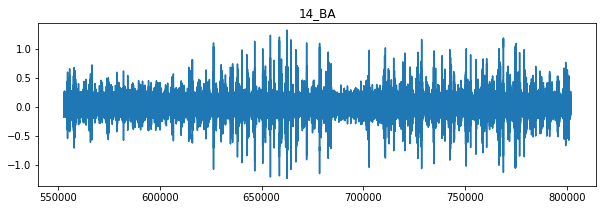

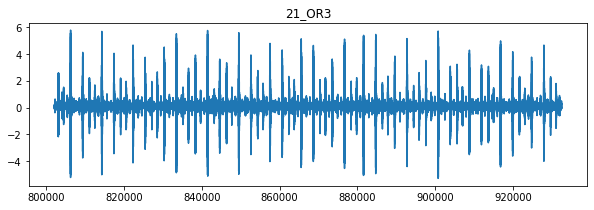

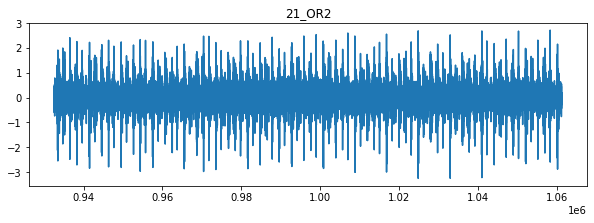

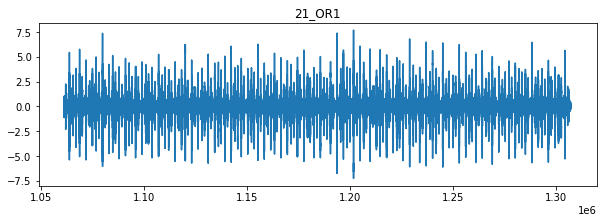

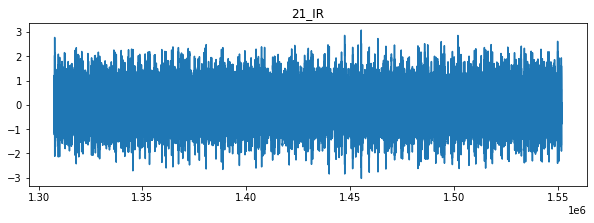

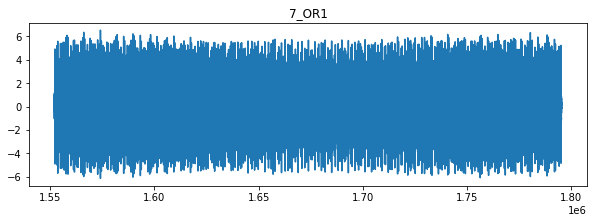

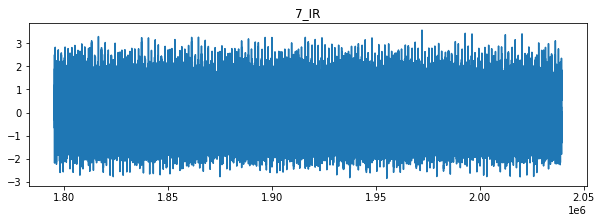

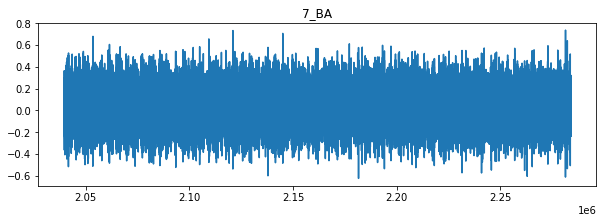

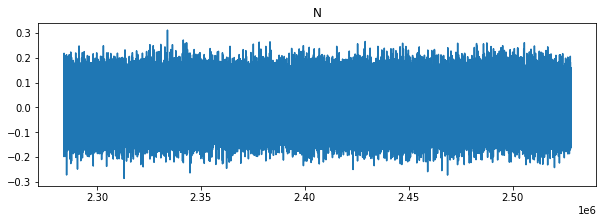

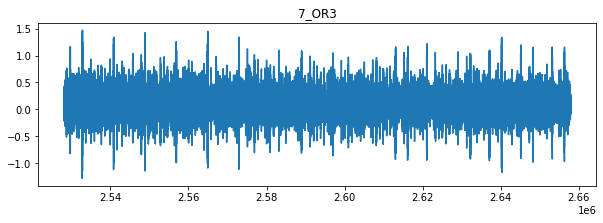

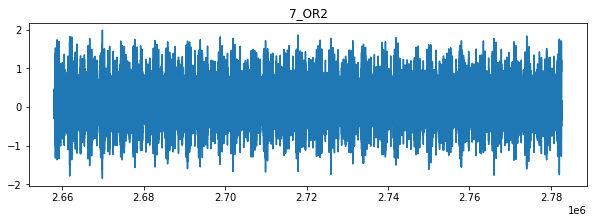

In [ ]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

Plotting it all together,
x-axis: Type of faults;
y-axis: acceloremeter data (DE)

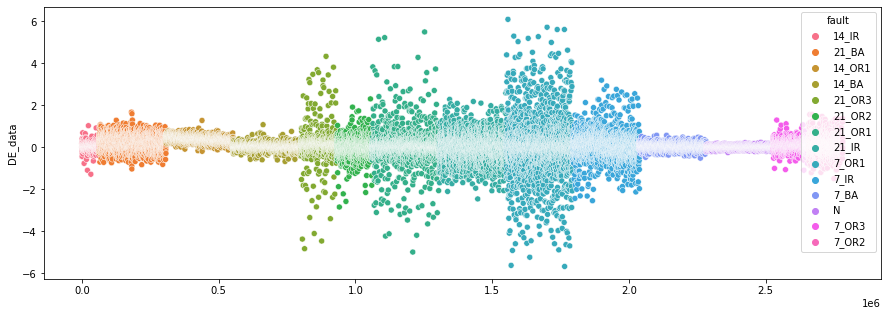

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df.iloc[::100,:],y='DE_data',x=np.arange(0,len(df),100),hue='fault')
plt.show()

# ANN model classification


In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/all_faults.csv')

In [ ]:
df['fault'].unique()

array(['14_IR', '21_BA', '14_OR1', '14_BA', '21_OR3', '21_OR2', '21_OR1',
       '21_IR', '7_OR1', '7_IR', '7_BA', 'N', '7_OR3', '7_OR2'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=1000
stride=200

X=[]
Y=[]


for k in df['fault'].unique():
    
    df_temp_2 = df[df['fault']==k]
    
    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])
    
X=np.array(X)
X=X.reshape((X.shape[0],win_len))



Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [ ]:
X.shape

(13848, 1000)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)

Visualising data using T-SNE(T-distributed Stochastic Neighbourhood Embedding)

It is used to to visualise the structure of high dimensional data in 2 or 3 dimensions.

n_components= number of coloumns

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 13848 samples in 0.013s...
[t-SNE] Computed neighbors for 13848 samples in 20.079s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13848
[t-SNE] Computed conditional probabilities for sample 2000 / 13848
[t-SNE] Computed conditional probabilities for sample 3000 / 13848
[t-SNE] Computed conditional probabilities for sample 4000 / 13848
[t-SNE] Computed conditional probabilities for sample 5000 / 13848
[t-SNE] Computed conditional probabilities for sample 6000 / 13848
[t-SNE] Computed conditional probabilities for sample 7000 / 13848
[t-SNE] Computed conditional probabilities for sample 8000 / 13848
[t-SNE] Computed conditional probabilities for sample 9000 / 13848
[t-SNE] Computed conditional probabilities for sample 10000 / 13848
[t-SNE] Computed conditional probabilities for sample 11000 / 13848
[t-SNE] Computed conditional probabilities for sample 12000 / 13848
[t-SNE] Computed conditional probabilities for s

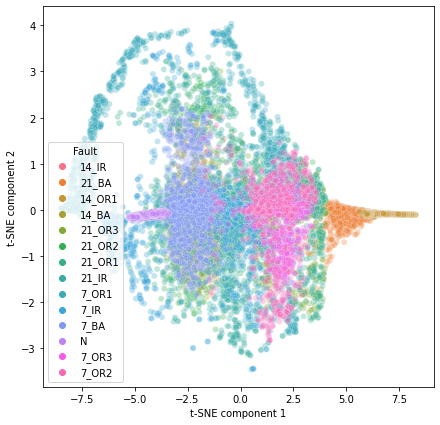

In [ ]:
X_pre_aen = X

from sklearn.manifold import TSNE

X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(X_pre_aen)

tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['t-SNE component 1', 't-SNE component 2'])

tSNEdf['Fault']=Y


# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=tSNEdf['t-SNE component 1'],y=tSNEdf['t-SNE component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()

Principle Components of t-SNE

In [ ]:
tSNEdf

,t-SNE component 1,t-SNE component 2,Fault
0,-1.454335,-0.283309,14_IR
1,-2.281034,-0.624651,14_IR
2,-1.885317,-0.177312,14_IR
3,-1.470799,-0.419851,14_IR
4,-1.430604,-1.060957,14_IR
...,...,...,...
13843,0.969139,0.132961,7_OR2
13844,2.137588,-0.054875,7_OR2
13845,0.511746,0.367057,7_OR2
13846,0.371806,-0.050440,7_OR2


Training the ANN model

number of neurons={1024(relu), 512, 256, 128, number_of_faults[14]()}

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten


# from tensorflow.keras.models import load_model
# AE_model = load_model(r'Trained Model\AE_model_gear.h5')


no_classes=len(encoder.classes_)
# build a model
model = Sequential()
model.add(Dense(1024, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              1025024   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 14)                1806      
                                                                 
Total params: 1,715,854
Trainable params: 1,715,854
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=50, # you can set this to a big number!
                    batch_size=500,
                    shuffle=True,
                    validation_data=(X_test,y_test),
                    verbose=1)

Epoch 1/50
20/20 [==============================] - 6s 198ms/step - loss: 1.7934 - accuracy: 0.3702 - val_loss: 1.1713 - val_accuracy: 0.5832
Epoch 2/50
20/20 [==============================] - 3s 157ms/step - loss: 0.8467 - accuracy: 0.7560 - val_loss: 0.5194 - val_accuracy: 0.8578
Epoch 3/50
20/20 [==============================] - 2s 106ms/step - loss: 0.4031 - accuracy: 0.8738 - val_loss: 0.4445 - val_accuracy: 0.8496
Epoch 4/50
20/20 [==============================] - 2s 104ms/step - loss: 0.2562 - accuracy: 0.9140 - val_loss: 0.2848 - val_accuracy: 0.9146
Epoch 5/50
20/20 [==============================] - 2s 102ms/step - loss: 0.1471 - accuracy: 0.9594 - val_loss: 0.1967 - val_accuracy: 0.9425
Epoch 6/50
20/20 [==============================] - 2s 102ms/step - loss: 0.0961 - accuracy: 0.9743 - val_loss: 0.1799 - val_accuracy: 0.9449
Epoch 7/50
20/20 [==============================] - 2s 103ms/step - loss: 0.0691 - accuracy: 0.9807 - val_loss: 0.1668 - val_accuracy: 0.9504
Epoch 

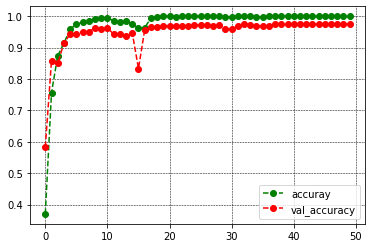

In [ ]:
plt.plot(history.history['accuracy'],'go--')
plt.plot(history.history['val_accuracy'],'ro--')
plt.legend(['accuray','val_accuracy'])
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.show()

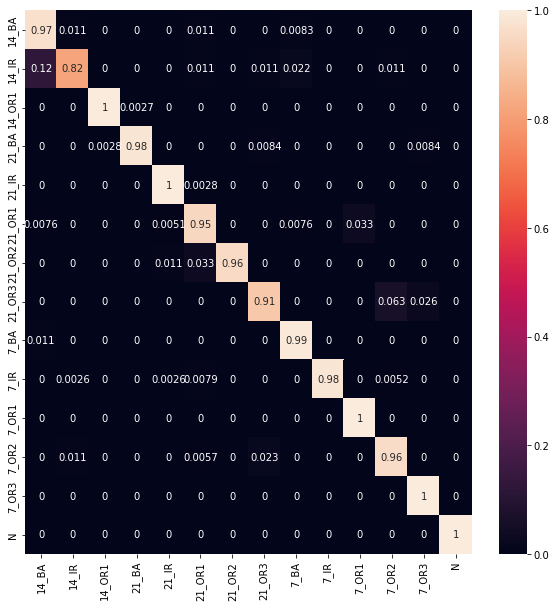

In [ ]:
def inv_Transform_result(y_pred):    
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred



y_pred=model.predict(X_test)


Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

In [ ]:
dummy_ann = Model(inputs=model.input,outputs=model.layers[-2].output)
y_viz = dummy_ann.predict(X_train)

In [ ]:
y_viz.shape

(9693, 128)

In [ ]:
def T_SNE_plot(X_train,y_train,model,encoder):
    
    dummy_ann = Model(inputs=model.input,outputs=model.layers[-2].output)
    y_viz = dummy_ann.predict(X_train)
    
    from sklearn.manifold import TSNE

    X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

    tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

    tSNEdf['Fault']=inv_Transform_result(y_train)


    # Plot the PC-1 and PC-2
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
        data=tSNEdf,
        legend="full",
        alpha=0.3)
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9693 samples in 0.005s...
[t-SNE] Computed neighbors for 9693 samples in 3.350s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9693
[t-SNE] Computed conditional probabilities for sample 2000 / 9693
[t-SNE] Computed conditional probabilities for sample 3000 / 9693
[t-SNE] Computed conditional probabilities for sample 4000 / 9693
[t-SNE] Computed conditional probabilities for sample 5000 / 9693
[t-SNE] Computed conditional probabilities for sample 6000 / 9693
[t-SNE] Computed conditional probabilities for sample 7000 / 9693
[t-SNE] Computed conditional probabilities for sample 8000 / 9693
[t-SNE] Computed conditional probabilities for sample 9000 / 9693
[t-SNE] Computed conditional probabilities for sample 9693 / 9693
[t-SNE] Mean sigma: 2.482718
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.863800
[t-SNE] KL divergence after 300 iterations: 2.140217


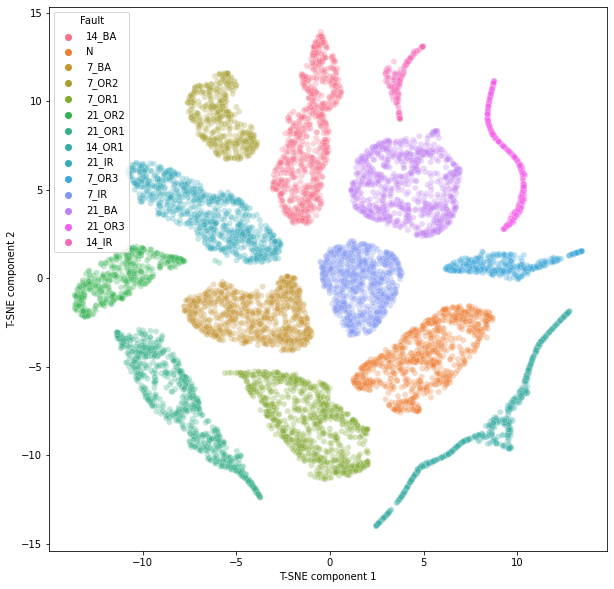

In [ ]:
T_SNE_plot(X_train,y_train,model,encoder)


In [ ]:
def Test_model_diff_loading(load,win_len,stride,model):
    
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/all_faults.csv'.format(load))

#     win_len=1000
#     stride=200

    X=[]
    Y=[]


    for k in df['fault'].unique():

        df_temp_2 = df[df['fault']==k]

        for i in np.arange(0,len(df_temp_2)-(win_len),stride):
            temp = df_temp_2.iloc[i:i+win_len,:-1].values
            temp = temp.reshape((1,-1))
            X.append(temp)
            Y.append(df_temp_2.iloc[i+win_len,-1])

    X=np.array(X)
    X=X.reshape((X.shape[0],win_len))



    Y=np.array(Y)
    encoder2= LabelEncoder()
    encoder2.fit(Y)
    encoded_Y = encoder2.transform(Y)
    OHE_Y = to_categorical(encoded_Y)


    def inv_Transform_result(y_pred,encoder):    
        y_pred = y_pred.argmax(axis=1)
        y_pred = encoder.inverse_transform(y_pred)
        return y_pred



    y_pred=model.predict(X)
    
    print('Accuracy on Load-{}hp data is---{}%'.format(load,(model.evaluate(X,OHE_Y)[1])*100))


    Y_pred=inv_Transform_result(y_pred,encoder2)
    Y_test = Y

    from sklearn.metrics import confusion_matrix

    plt.figure(figsize=(10,10))
    cm = confusion_matrix(Y_test, Y_pred,normalize='true')
    f = sns.heatmap(cm, annot=True,xticklabels=encoder.classes_,yticklabels=encoder.classes_)
    plt.show()
    print()
    
    T_SNE_plot(X[::10,:],OHE_Y[::10,:],model,encoder2)

433/433 [==============================] - 3s 7ms/step - loss: 0.0372 - accuracy: 0.9928
Accuracy on Load-1hp data is---99.27787184715271%


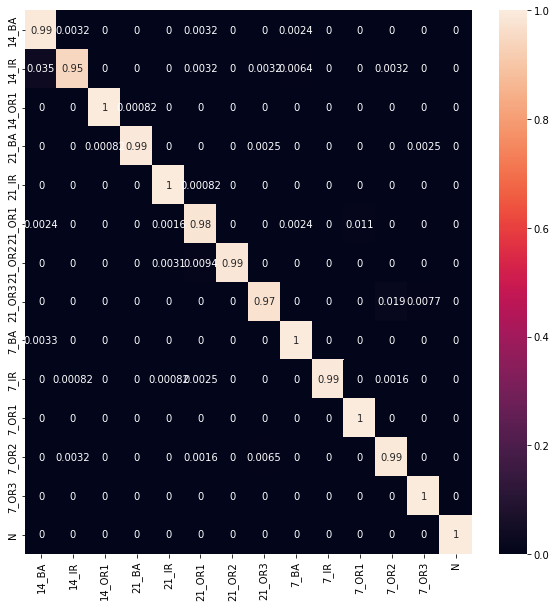

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1385 samples in 0.002s...
[t-SNE] Computed neighbors for 1385 samples in 0.085s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1385
[t-SNE] Computed conditional probabilities for sample 1385 / 1385
[t-SNE] Mean sigma: 4.996138
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.832905
[t-SNE] KL divergence after 300 iterations: 0.709143


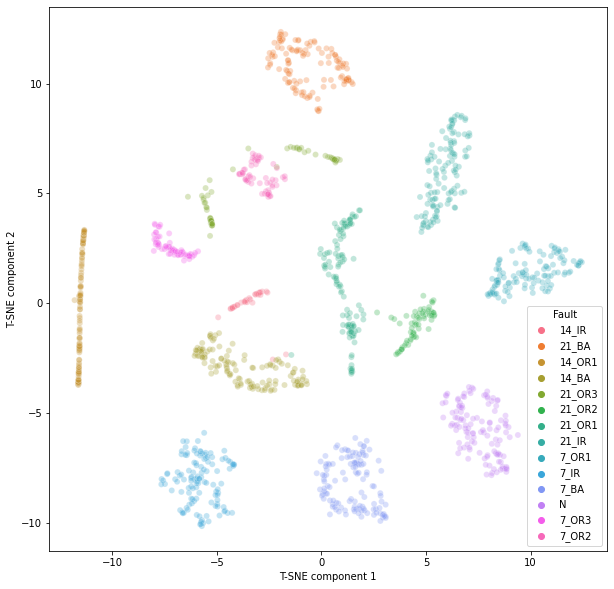

In [ ]:
Test_model_diff_loading(load=1,win_len=1000,stride=200,model=model)

433/433 [==============================] - 3s 7ms/step - loss: 0.0372 - accuracy: 0.9928
Accuracy on Load-2hp data is---99.27787184715271%


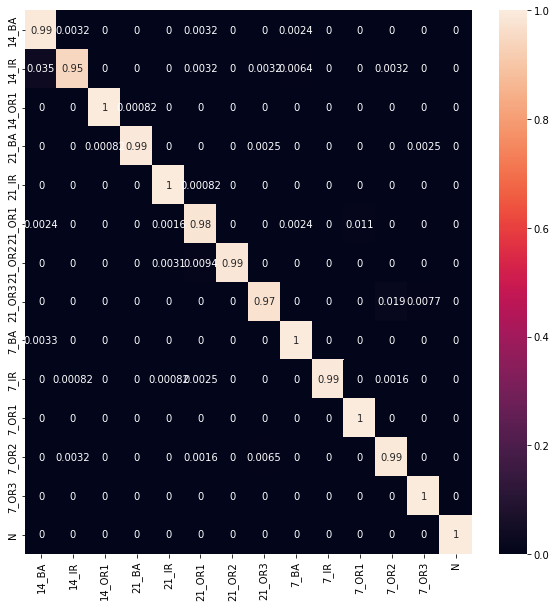

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1385 samples in 0.000s...
[t-SNE] Computed neighbors for 1385 samples in 0.074s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1385
[t-SNE] Computed conditional probabilities for sample 1385 / 1385
[t-SNE] Mean sigma: 4.996138
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.883766
[t-SNE] KL divergence after 300 iterations: 0.701021


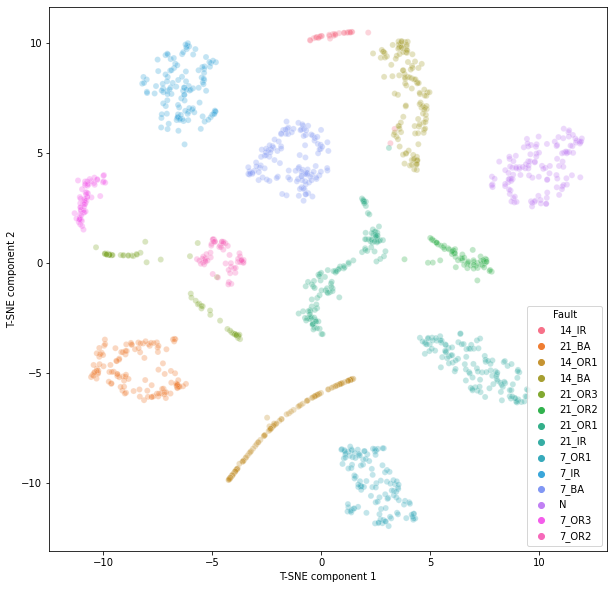

In [ ]:
Test_model_diff_loading(load=2,win_len=1000,stride=200,model=model)

433/433 [==============================] - 3s 6ms/step - loss: 0.0372 - accuracy: 0.9928
Accuracy on Load-3hp data is---99.27787184715271%


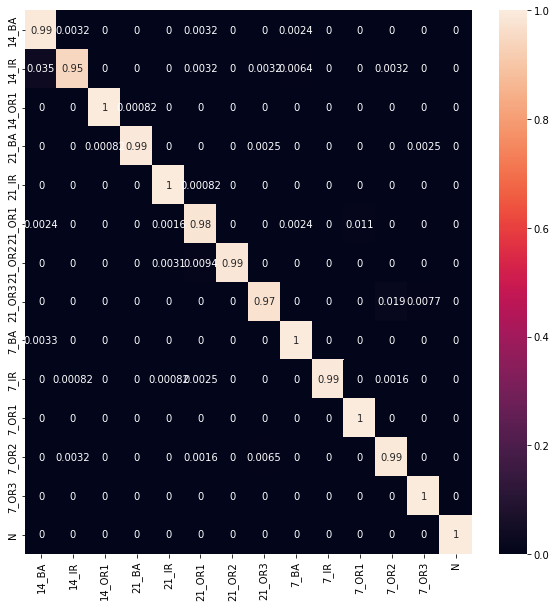

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1385 samples in 0.000s...
[t-SNE] Computed neighbors for 1385 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1385
[t-SNE] Computed conditional probabilities for sample 1385 / 1385
[t-SNE] Mean sigma: 4.996138
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.785824
[t-SNE] KL divergence after 300 iterations: 0.704309


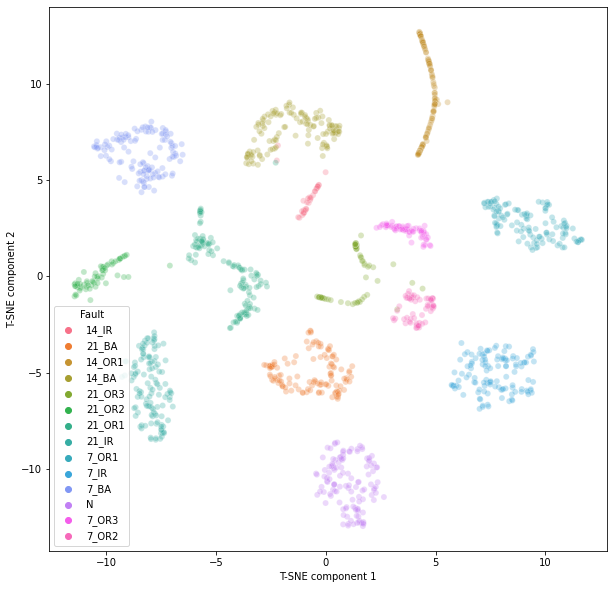

In [ ]:
Test_model_diff_loading(load=3,win_len=1000,stride=200,model=model)

# 1D CNN for Bearing Vibration

In [ ]:
import scipy.io
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/all_faults.csv')

In [ ]:
df

,DE_data,fault
0,0.181957,14_IR
1,0.203241,14_IR
2,0.211588,14_IR
3,0.196564,14_IR
4,0.164847,14_IR
...,...,...
2782624,-0.289975,7_OR2
2782625,-0.332950,7_OR2
2782626,-0.341086,7_OR2
2782627,-0.328152,7_OR2


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=784
stride=300

X=[]
Y=[]


for k in df['fault'].unique():
    
    df_temp_2 = df[df['fault']==k]
    
    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])
    
X=np.array(X)
X=X.reshape((X.shape[0],-1,1))
#X = np.repeat(X, 3, axis=3) # To repeat into 3 chanel format


Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [ ]:
X.shape

(9246, 784, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Conv1D,MaxPooling1D



# from tensorflow.keras.models import load_model
# cnn_model = load_model(r'H:\Gear Fault\Trained Model\CNN_model_gear.h5')



no_classes = len(df['fault'].unique())

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=100, activation='relu', input_shape=(X.shape[1],X.shape[2])))
cnn_model.add(Conv1D(filters=32, kernel_size=50, activation='relu'))

cnn_model.add(MaxPooling1D(pool_size=4))
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))

            
cnn_model.add(Dense(no_classes, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 685, 64)           6464      
                                                                 
 conv1d_1 (Conv1D)           (None, 636, 32)           102432    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 159, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5088)              0         
                                                                 
 dense (Dense)               (None, 100)               508900    
                                                                 
 dense_1 (Dense)             (None, 14)                1414      
                                                        

In [ ]:
batch_size =150
epochs = 5
history = cnn_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/5
44/44 [==============================] - 106s 2s/step - loss: 1.3301 - accuracy: 0.5437 - val_loss: 0.6824 - val_accuracy: 0.7974
Epoch 2/5
44/44 [==============================] - 99s 2s/step - loss: 0.4742 - accuracy: 0.8708 - val_loss: 0.2990 - val_accuracy: 0.9037
Epoch 3/5
44/44 [==============================] - 102s 2s/step - loss: 0.1608 - accuracy: 0.9492 - val_loss: 0.0906 - val_accuracy: 0.9712
Epoch 4/5
44/44 [==============================] - 106s 2s/step - loss: 0.0504 - accuracy: 0.9861 - val_loss: 0.0543 - val_accuracy: 0.9834
Epoch 5/5
44/44 [==============================] - 101s 2s/step - loss: 0.0286 - accuracy: 0.9934 - val_loss: 0.0462 - val_accuracy: 0.9845


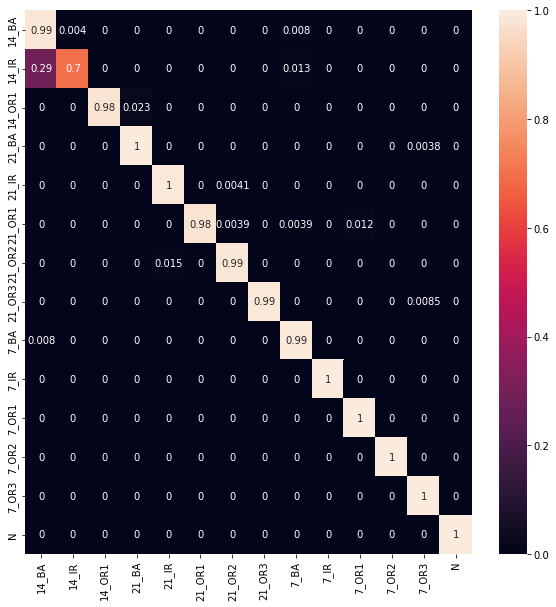

In [ ]:
def inv_Transform_result(y_pred):    
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred



y_pred=cnn_model.predict(X_test)


Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

In [ ]:
dummy_cnn = Model(inputs=cnn_model.input,outputs=cnn_model.layers[5].output)
y_viz = dummy_cnn.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6472 samples in 0.013s...
[t-SNE] Computed neighbors for 6472 samples in 0.286s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6472
[t-SNE] Computed conditional probabilities for sample 2000 / 6472
[t-SNE] Computed conditional probabilities for sample 3000 / 6472
[t-SNE] Computed conditional probabilities for sample 4000 / 6472
[t-SNE] Computed conditional probabilities for sample 5000 / 6472
[t-SNE] Computed conditional probabilities for sample 6000 / 6472
[t-SNE] Computed conditional probabilities for sample 6472 / 6472
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.917961
[t-SNE] KL divergence after 300 iterations: 1.421793


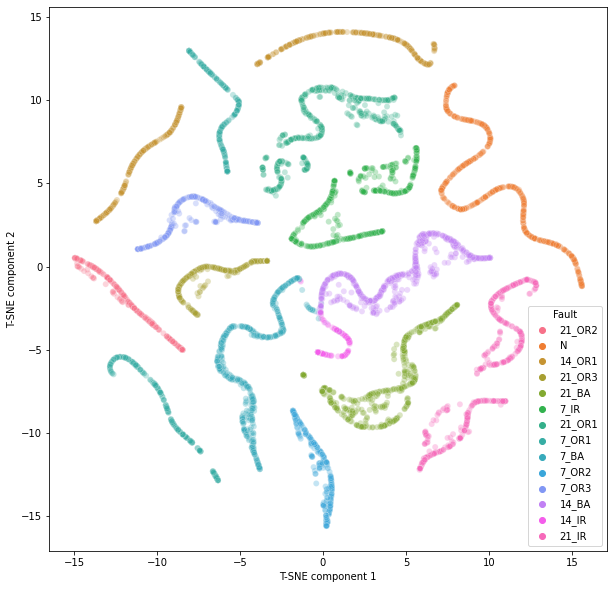

In [ ]:
from sklearn.manifold import TSNE

X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

tSNEdf['Fault']=inv_Transform_result(y_train)


# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()

# 2D-CNN VIBRATION SIGNAL TO IMAGE

In [ ]:
import scipy.io
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/all_faults.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=784
stride=300

X=[]
Y=[]


for k in df['fault'].unique():
    
    df_temp_2 = df[df['fault']==k]
    
    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])
    
X=np.array(X)
X=X.reshape((X.shape[0],28,28,1))
#X = np.repeat(X, 3, axis=3) # To repeat into 3 chanel format


Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [ ]:
X.shape

(9246, 28, 28, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)



In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D



# from tensorflow.keras.models import load_model
# cnn_model = load_model(r'H:\Gear Fault\Trained Model\CNN_model_gear.h5')



no_classes = len(df['fault'].unique())

cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(X.shape[1],X.shape[2],1),padding='same'))

cnn_model.add(MaxPooling2D((2, 2),strides=(2, 2),padding='same'))

cnn_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))

cnn_model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2),padding='same'))

# cnn_model.add(Conv2D(128, (5, 3), activation='relu',padding='same'))
                 
# cnn_model.add(MaxPooling2D(pool_size=(5, 2),strides=(3, 3),padding='same'))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
            
cnn_model.add(Dense(no_classes, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# 1D CNN with Multiple Kernels

In [ ]:
import scipy.io
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/all_faults.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=784
stride=300

X=[]
Y=[]


for k in df['fault'].unique():
    
    df_temp_2 = df[df['fault']==k]
    
    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])
    
X=np.array(X)
X=X.reshape((X.shape[0],-1,1))
#X = np.repeat(X, 3, axis=3) # To repeat into 3 chanel format


Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [ ]:
X.shape

(9246, 784, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Conv1D,MaxPooling1D
from tensorflow.keras.utils import plot_model

from tensorflow.keras.layers import concatenate

# from tensorflow.keras.models import load_model
# cnn_model = load_model(r'H:\Gear Fault\Trained Model\CNN_model_gear.h5')
import tensorflow
tensorflow.config.run_functions_eagerly(True)

no_classes = len(df['fault'].unique())
#head 1
inputs1 = Input(shape=(X.shape[1],X.shape[2]))
conv1 = Conv1D(filters=64, kernel_size=200, activation='relu')(inputs1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=20)(drop1)
flat1 = Flatten()(pool1)
# head 2
inputs2 = Input(shape=(X.shape[1],X.shape[2]))
conv2 = Conv1D(filters=64, kernel_size=100, activation='relu')(inputs2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=10)(drop2)
flat2 = Flatten()(pool2)
# head 3
inputs3 = Input(shape=(X.shape[1],X.shape[2]))
conv3 = Conv1D(filters=64, kernel_size=50, activation='relu')(inputs3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=5)(drop3)
flat3 = Flatten()(pool3)
# merge
merged = concatenate([flat1, flat2, flat3])
# interpretation
dense1 = Dense(100, activation='relu')(merged)
outputs = Dense(no_classes, activation='softmax')(dense1)
cnn_model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)

# Plot Model
cnn_model.summary()
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784, 1)]     0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 784, 1)]     0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 784, 1)]     0           []                               
                                                                                                  
 conv1d_2 (Conv1D)              (None, 585, 64)      12864       ['input_1[0][0]']                
                                                                                            

In [ ]:
batch_size =100
epochs = 5
history = cnn_model.fit([X_train,X_train,X_train], y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=([X_test,X_test,X_test],y_test),shuffle=True)


Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


65/65 [==============================] - 52s 798ms/step - loss: 1.2489 - accuracy: 0.5876 - val_loss: 0.5998 - val_accuracy: 0.9009
Epoch 2/5
65/65 [==============================] - 51s 789ms/step - loss: 0.2166 - accuracy: 0.9387 - val_loss: 0.2400 - val_accuracy: 0.9640
Epoch 3/5
65/65 [==============================] - 53s 823ms/step - loss: 0.0620 - accuracy: 0.9872 - val_loss: 0.1542 - val_accuracy: 0.9813
Epoch 4/5
65/65 [==============================] - 50s 773ms/step - loss: 0.0701 - accuracy: 0.9822 - val_loss: 0.1293 - val_accuracy: 0.9798
Epoch 5/5
65/65 [==============================] - 50s 768ms/step - loss: 0.0535 - accuracy: 0.9870 - val_loss: 0.0984 - val_accuracy: 0.9791


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


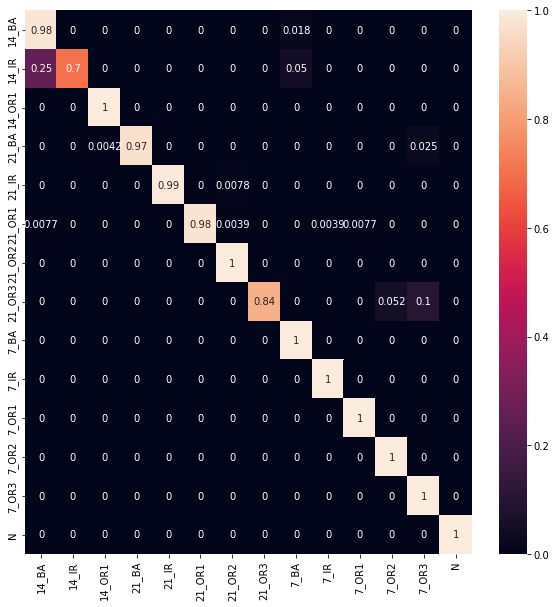

In [ ]:
def inv_Transform_result(y_pred):    
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred



y_pred=cnn_model.predict([X_test,X_test,X_test])


Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

In [ ]:
dummy_cnn = Model(inputs=cnn_model.input,outputs=cnn_model.layers[16].output)
y_viz = dummy_cnn.predict([X_train,X_train,X_train])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
y_viz.shape

(6472, 100)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6472 samples in 0.001s...
[t-SNE] Computed neighbors for 6472 samples in 2.277s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6472
[t-SNE] Computed conditional probabilities for sample 2000 / 6472
[t-SNE] Computed conditional probabilities for sample 3000 / 6472
[t-SNE] Computed conditional probabilities for sample 4000 / 6472
[t-SNE] Computed conditional probabilities for sample 5000 / 6472
[t-SNE] Computed conditional probabilities for sample 6000 / 6472
[t-SNE] Computed conditional probabilities for sample 6472 / 6472
[t-SNE] Mean sigma: 1.280683
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.381454
[t-SNE] KL divergence after 300 iterations: 1.751999


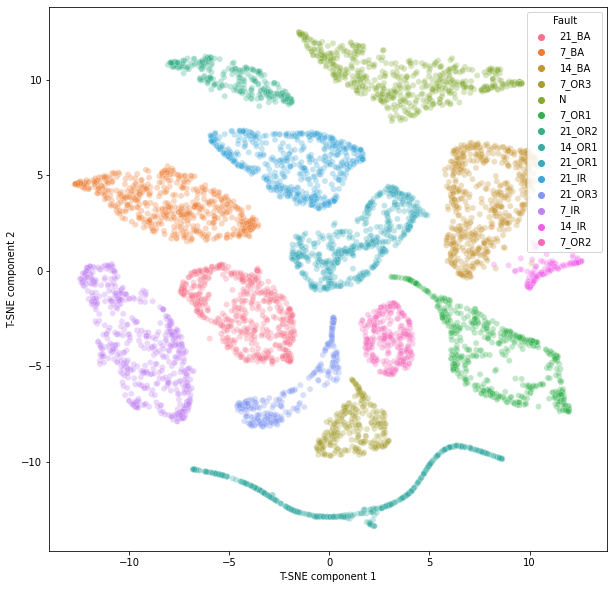

In [ ]:
from sklearn.manifold import TSNE

X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

tSNEdf['Fault']=inv_Transform_result(y_train)


# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()

# KNN Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/all_faults.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

FileNotFoundError: ignored

In [ ]:
X

array([[ 0.18195733],
       [ 0.20324133],
       [ 0.211588  ],
       ...,
       [-0.34108615],
       [-0.328152  ],
       [-0.29060123]])

In [ ]:
y

array(['14_IR', '14_IR', '14_IR', ..., '7_OR2', '7_OR2', '7_OR2'],
      dtype=object)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_test

array([[ 0.43558892],
       [ 2.02114533],
       [ 0.574944  ],
       ...,
       [-0.06677333],
       [ 0.27377067],
       [ 0.32377108]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print(classifier.predict([[0.323]]))

['21_OR3']


In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['14_OR1' '14_OR1']
 ['21_IR' '7_OR1']
 ['14_OR1' '7_OR2']
 ...
 ['21_OR1' '21_OR3']
 ['21_OR1' '21_OR2']
 ['21_IR' '7_OR3']]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
# print(cm)
accuracy_score(y_test, y_pred)

0.3204117540515598

#  SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intern Project/0_load_48_KHz/all_faults.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()